In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import histlite as hl
import csky as cy
import healpy as hp

import pickle as pkl

In [2]:
selection = cy.selections.PSDataSpecs.ps_10yr
version = 'version-003-p02'
dSetName = 'ps-v3p2'
ana_dir = cy.utils.ensure_dir('/data/user/mcampana/analysis/Blazar_1FLE/subanalyses/{}'.format(dSetName))
ana = cy.get_analysis(cy.selections.repo, version, selection, dir=ana_dir)

Setting up Analysis for:
IC40, IC59, IC79, IC86_2011, IC86v3_2012_2017
Setting up IC40...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC40_MC.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC40_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/GRL/IC40_exp.npy ...
<- /data/user/mcampana/analysis/Blazar_1FLE/subanalyses/ps-v3p2/IC40.subanalysis.version-003-p02.npy    
Setting up IC59...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC59_MC.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC59_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/GRL/IC59_exp.npy ...
<- /data/user/mcampana/analysis/Blazar_1FLE/subanalyses/ps-v3p2/IC59.subanalysis.version-003-p02.npy    
Setting up IC79...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC79_MC.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC79_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/GRL/IC79_exp.npy ...
<- /data/user/mcampana/

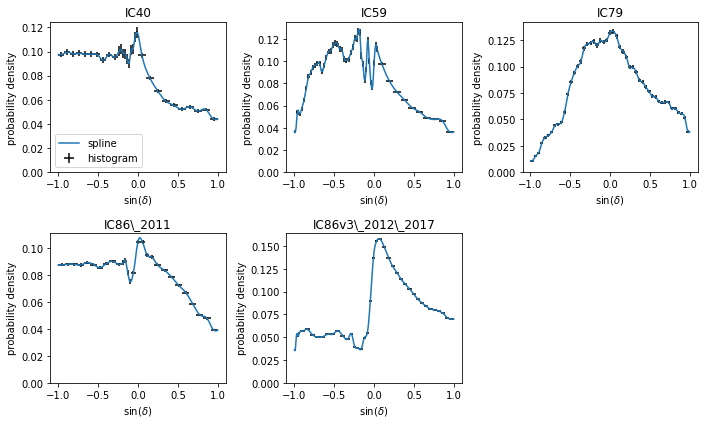

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(10,6))
axs = np.ravel(axs)
for (i, a) in enumerate(ana):
    ax = axs[i]
    hl.plot1d (ax, a.bg_space_param.h, crosses=True, color='k', label='histogram')
    sd = np.linspace (-1, 1, 300)
    ax.plot (sd, a.bg_space_param(sindec=sd), label='spline')
    ax.set_ylim(0)
    ax.set_title(a.plot_key)
    ax.set_xlabel(r'$\sin(\delta)$')
    ax.set_ylabel(r'probability density')
axs[0].legend(loc='lower left')
plt.tight_layout()
axs[-1].set_visible(False)

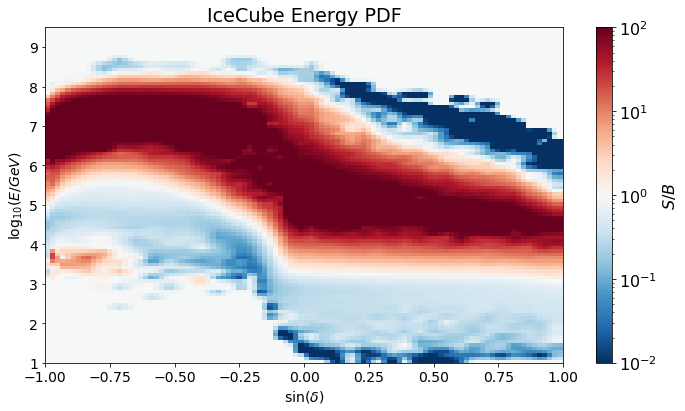

In [28]:
gamma = 2
fig, ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.rc('font', size=16)
a = ana[-1]
eprm = a.energy_pdf_ratio_model
ss = dict(zip(eprm.gammas, eprm.ss_hl))
things = hl.plot2d(ax, ss[gamma].eval(bins=100),
                   vmin=1e-2, vmax=1e2, log=True, cbar=True, cmap='RdBu_r')
ax.set_title('IceCube Energy PDF')
things['colorbar'].set_label(r'$S/B$')
ax.set_xlabel(r'$\sin(\delta)$')
ax.set_ylabel(r'$\log_{10}(E/{GeV})$')
plt.tight_layout()
axs[-1].set_visible(False)

In [15]:
def PlotMollviewEqui(title,DecArr,RaArr,nside=64,rot=None,coord=None):
    #Plots mollweide projection of equitorial coords in degrees
    nside = nside
    npix = hp.nside2npix(nside)
    map_ind = hp.ang2pix(nside,np.pi/2.0 - np.radians(DecArr),np.radians(RaArr))
    ind, count = np.unique(map_ind, return_counts=True)
    hpx_map = np.zeros(npix, dtype=int)
    hpx_map[ind] = count
    
    plt.figure()
    hp.mollview(hpx_map, unit='Counts', title=title, rot=rot, margins=(1,1,1,1), coord=coord) 
    hp.graticule(30, color='w', alpha=0.7)
    
    hp.projtext(0,0,'90', size='large', ha='center', va='bottom', coord=coord)#, rot=rot)
    hp.projtext(np.pi/2,2.0*np.pi - .001,'360', size='large', ha='right', coord=coord)#, rot=rot)
    hp.projtext(np.pi/2,0,'0', size='large', ha='left', coord=coord)#, rot=rot)
    hp.projtext(np.pi,0,'-90', size='large', ha='center', va='top', coord=coord)#, rot=rot)
    
    hp.projscatter(np.pi/2.0 + 0.506, 4.650, marker='x', color='r', label='GC')
    plt.legend()
    plt.title(title, pad=25)
    plt.show()

In [4]:
DEC_deg = np.array([])
for a in ana.anas: 
    DEC_deg = np.append(DEC_deg, a.data.dec_deg)
    
RA_deg = np.random.uniform(0, 360, size=DEC_deg.shape)
print(RA_deg[:5])

[253.64097762 268.47751981 231.84603598 267.24724261 339.63444528]


<Figure size 432x288 with 0 Axes>

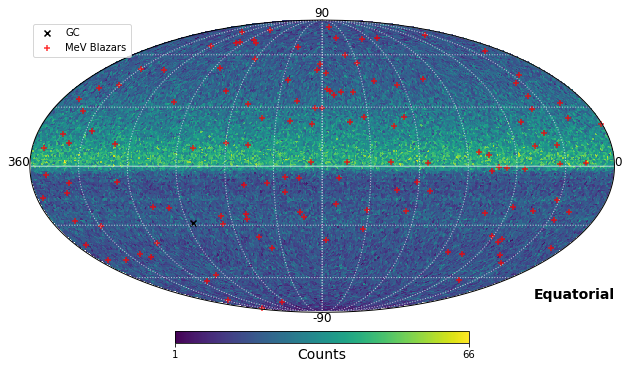

In [16]:
PlotMollviewEqui('', DEC_deg, RA_deg, DEdeg, RAdeg, nside=64, coord='C', rot=(180,0,0))